# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd

## Regression Model Evaluation

In [5]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [3]:
from sklearn.model_selection import train_test_split

In [ ]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_train)
y_test_pred=linreg.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_train,y_pred)

In [ ]:
r2_score(y_test,y_test_pred)

In [ ]:
linreg.score(X_test,y_test)

## 4. Calculate and print mean squared error for both the training and the testing set.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_train,y_pred)

In [ ]:
mean_squared_error(y_test,y_test_pred)

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_train,y_pred)

In [ ]:
mean_absolute_error(y_test,y_test_pred)

## Classification Model Evaluation

In [6]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [7]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [8]:
X_train_iris,X_test_iris,y_train_iris,y_test_iris=train_test_split(X,y['class'],test_size=0.2)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
logreg=LogisticRegression(max_iter=1000)
logreg.fit(X_train_iris.values,y_train_iris.values)
y_pred_iris=logreg.predict(X_train_iris)
y_test_pred_iris=logreg.predict(X_test_iris)

C:\Users\USUARIO\anaconda4\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\USUARIO\anaconda4\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy_score(y_train_iris,y_pred_iris)

0.9666666666666667

In [14]:
accuracy_score(y_test_iris,y_test_pred_iris)

1.0

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [15]:
from sklearn.metrics import balanced_accuracy_score

In [16]:
balanced_accuracy_score(y_train_iris,y_pred_iris)

0.9666070363744783

In [17]:
balanced_accuracy_score(y_test_iris,y_test_pred_iris)

1.0

## 10. Calculate and print the precision score for both the training and the testing set.

In [21]:
from sklearn.metrics import precision_score

In [22]:
precision_score(y_train_iris,y_pred_iris,average=None)

array([1.        , 0.97297297, 0.93333333])

In [23]:
precision_score(y_test_iris,y_test_pred_iris,average=None)

array([1., 1., 1.])

## 11. Calculate and print the recall score for both the training and the testing set.

In [24]:
from sklearn.metrics import recall_score

In [25]:
recall_score(y_train_iris,y_pred_iris,average=None)

array([1.        , 0.92307692, 0.97674419])

In [26]:
recall_score(y_test_iris,y_test_pred_iris,average=None)

array([1., 1., 1.])

## 12. Calculate and print the F1 score for both the training and the testing set.

In [27]:
from sklearn.metrics import f1_score

In [28]:
f1_score(y_train_iris,y_pred_iris,average=None)

array([1.        , 0.94736842, 0.95454545])

In [29]:
f1_score(y_test_iris,y_test_pred_iris,average=None)

array([1., 1., 1.])

## 13. Generate confusion matrices for both the training and the testing set.

In [31]:
from sklearn.metrics import confusion_matrix

[[38  0  0]
 [ 0 36  3]
 [ 0  1 42]]


<AxesSubplot:>

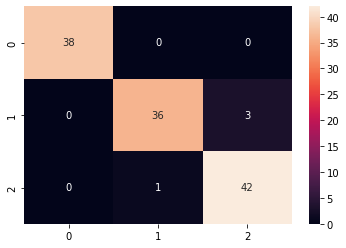

In [50]:
import seaborn as sns

conf_m=confusion_matrix(y_train_iris, y_pred_iris)

print (conf_m)
sns.heatmap(conf_m, annot=True)
#plt.show();

[[12  0  0]
 [ 0 11  0]
 [ 0  0  7]]


<AxesSubplot:>

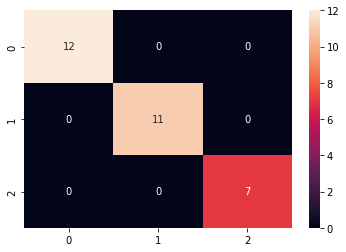

In [49]:
import seaborn as sns

conf_m=confusion_matrix(y_test_iris, y_test_pred_iris)

print (conf_m)
sns.heatmap(conf_m, annot=True)
#plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rfc=RandomForestClassifier(n_estimators=100,max_depth=4)
rfc.fit(X_train_iris,y_train_iris)
y_pred_iris_rfc=rfc.predict(X_train_iris)
y_test_pred_iris_rfc=rfc.predict(X_test_iris)
print('Random Forest Classifier')
print(f'Train accuracy score: {accuracy_score(y_train_iris,y_pred_iris_rfc)}, Test accuracy score: {accuracy_score(y_test_iris,y_test_pred_iris_rfc)}')
print(f'Train balanced accuracy score: {balanced_accuracy_score(y_train_iris,y_pred_iris_rfc)}, Test balanced accuracy score: {balanced_accuracy_score(y_test_iris,y_test_pred_iris_rfc)}')
print(f'Train precision score: {precision_score(y_train_iris,y_pred_iris_rfc,average=None)}, Test precision score: {precision_score(y_test_iris,y_test_pred_iris_rfc,average=None)}')
print(f'Train recall score: {recall_score(y_train_iris,y_pred_iris_rfc,average=None)}, Test recall score: {recall_score(y_test_iris,y_test_pred_iris_rfc,average=None)}')
print(f'Train F1 score: {f1_score(y_train_iris,y_pred_iris_rfc,average=None)}, Test F1 score: {f1_score(y_test_iris,y_test_pred_iris_rfc,average=None)}')
#print(f'Train confusion matrix:\n {confusion_matrix(y_train_iris,y_pred_iris_rfc)}\nTest confusion matrix: \n{confusion_matrix(y_test_iris,y_test_pred_iris_rfc)}')


Random Forest Classifier
Train accuracy score: 0.9916666666666667, Test accuracy score: 1.0
Train balanced accuracy score: 0.9922480620155039, Test balanced accuracy score: 1.0
Train precision score: [1.    0.975 1.   ], Test precision score: [1. 1. 1.]
Train recall score: [1.         1.         0.97674419], Test recall score: [1. 1. 1.]
Train F1 score: [1.         0.98734177 0.98823529], Test F1 score: [1. 1. 1.]


[[38  0  0]
 [ 0 39  0]
 [ 0  1 42]]


<AxesSubplot:>

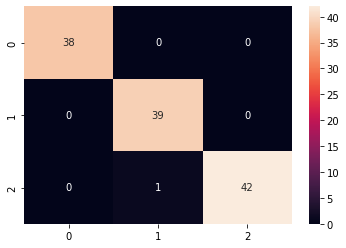

In [59]:
conf_m_rfc_train=confusion_matrix(y_train_iris, y_pred_iris_rfc)

print (conf_m_rfc_train)
sns.heatmap(conf_m_rfc_train, annot=True)


[[12  0  0]
 [ 0 11  0]
 [ 0  0  7]]


<AxesSubplot:>

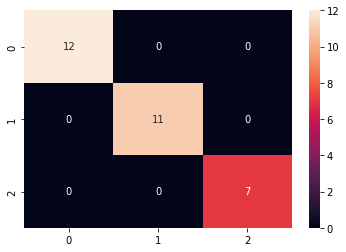

In [61]:
conf_m_rfc_test=confusion_matrix(y_test_iris, y_test_pred_iris_rfc)

print (conf_m_rfc_test)
sns.heatmap(conf_m_rfc_test, annot=True)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
knn=KNeighborsClassifier()
knn.fit(X_train_iris,y_train_iris)
y_pred_iris_knn=knn.predict(X_train_iris)
y_test_pred_iris_knn=knn.predict(X_test_iris)
print('KNeighbors Classifier')
print(f'Train accuracy score: {accuracy_score(y_train_iris,y_pred_iris_knn)}, Test accuracy score: {accuracy_score(y_test_iris,y_test_pred_iris_knn)}')
print(f'Train balanced accuracy score: {balanced_accuracy_score(y_train_iris,y_pred_iris_knn)}, Test balanced accuracy score: {balanced_accuracy_score(y_test_iris,y_test_pred_iris_knn)}')
print(f'Train precision score: {precision_score(y_train_iris,y_pred_iris_knn,average=None)}, Test precision score: {precision_score(y_test_iris,y_test_pred_iris_knn,average=None)}')
print(f'Train recall score: {recall_score(y_train_iris,y_pred_iris_knn,average=None)}, Test recall score: {recall_score(y_test_iris,y_test_pred_iris_knn,average=None)}')
print(f'Train F1 score: {f1_score(y_train_iris,y_pred_iris_knn,average=None)}, Test F1 score: {f1_score(y_test_iris,y_test_pred_iris_knn,average=None)}')
#print(f'Train confusion matrix:\n {confusion_matrix(y_train_iris,y_pred_iris_knn)}\nTest confusion_matrix: \n{confusion_matrix(y_test_iris,y_test_pred_iris_knn)}')


KNeighbors Classifier
Train accuracy score: 0.9666666666666667, Test accuracy score: 1.0
Train balanced accuracy score: 0.9666070363744783, Test balanced accuracy score: 1.0
Train precision score: [1.         0.97297297 0.93333333], Test precision score: [1. 1. 1.]
Train recall score: [1.         0.92307692 0.97674419], Test recall score: [1. 1. 1.]
Train F1 score: [1.         0.94736842 0.95454545], Test F1 score: [1. 1. 1.]


[[38  0  0]
 [ 0 36  3]
 [ 0  1 42]]


<AxesSubplot:>

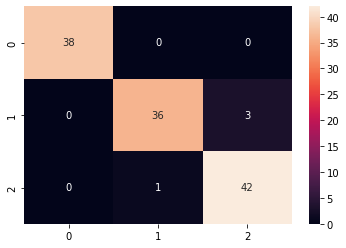

In [63]:
conf_m_knn_train=confusion_matrix(y_train_iris, y_pred_iris_knn)

print (conf_m_knn_train)
sns.heatmap(conf_m_knn_train, annot=True)

[[12  0  0]
 [ 0 11  0]
 [ 0  0  7]]


<AxesSubplot:>

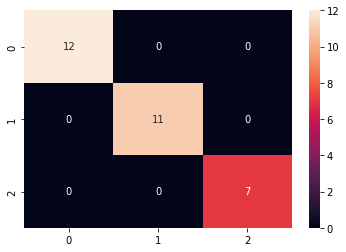

In [64]:
conf_m_knn_test=confusion_matrix(y_test_iris, y_test_pred_iris_knn)

print (conf_m_knn_test)
sns.heatmap(conf_m_knn_test, annot=True)